In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import time

# Program Start time
program_start_time = time.time()

In [3]:
df1 = pd.read_csv('E:\ML\Assignment 1\diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
np.random.seed(42)

In [5]:
df1.shape

(253680, 22)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
unique_values = {}
for col in df1.columns:
    unique_values[col] = df1[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [9]:
df1.duplicated().sum()

24206

In [10]:
df1.drop_duplicates(inplace=True)
df1.shape

(229474, 22)

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

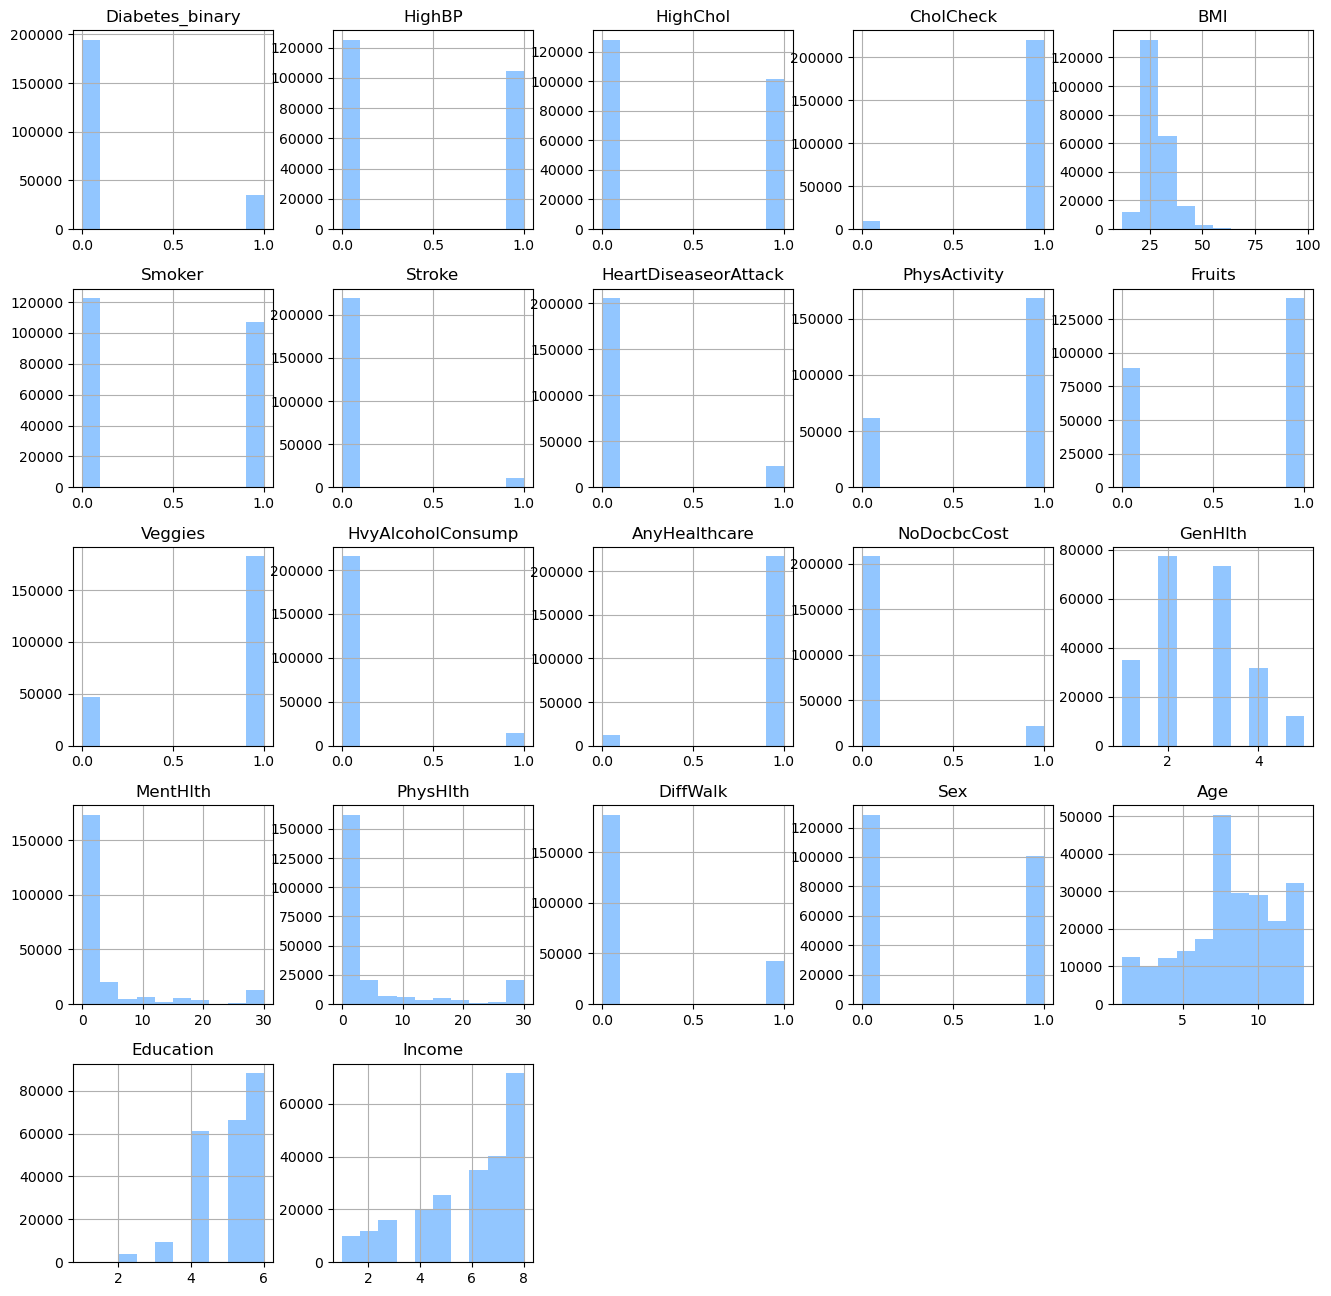

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
df1.hist(figsize=(16, 16))

<Axes: title={'center': 'Correlation with Diabetes Column'}>

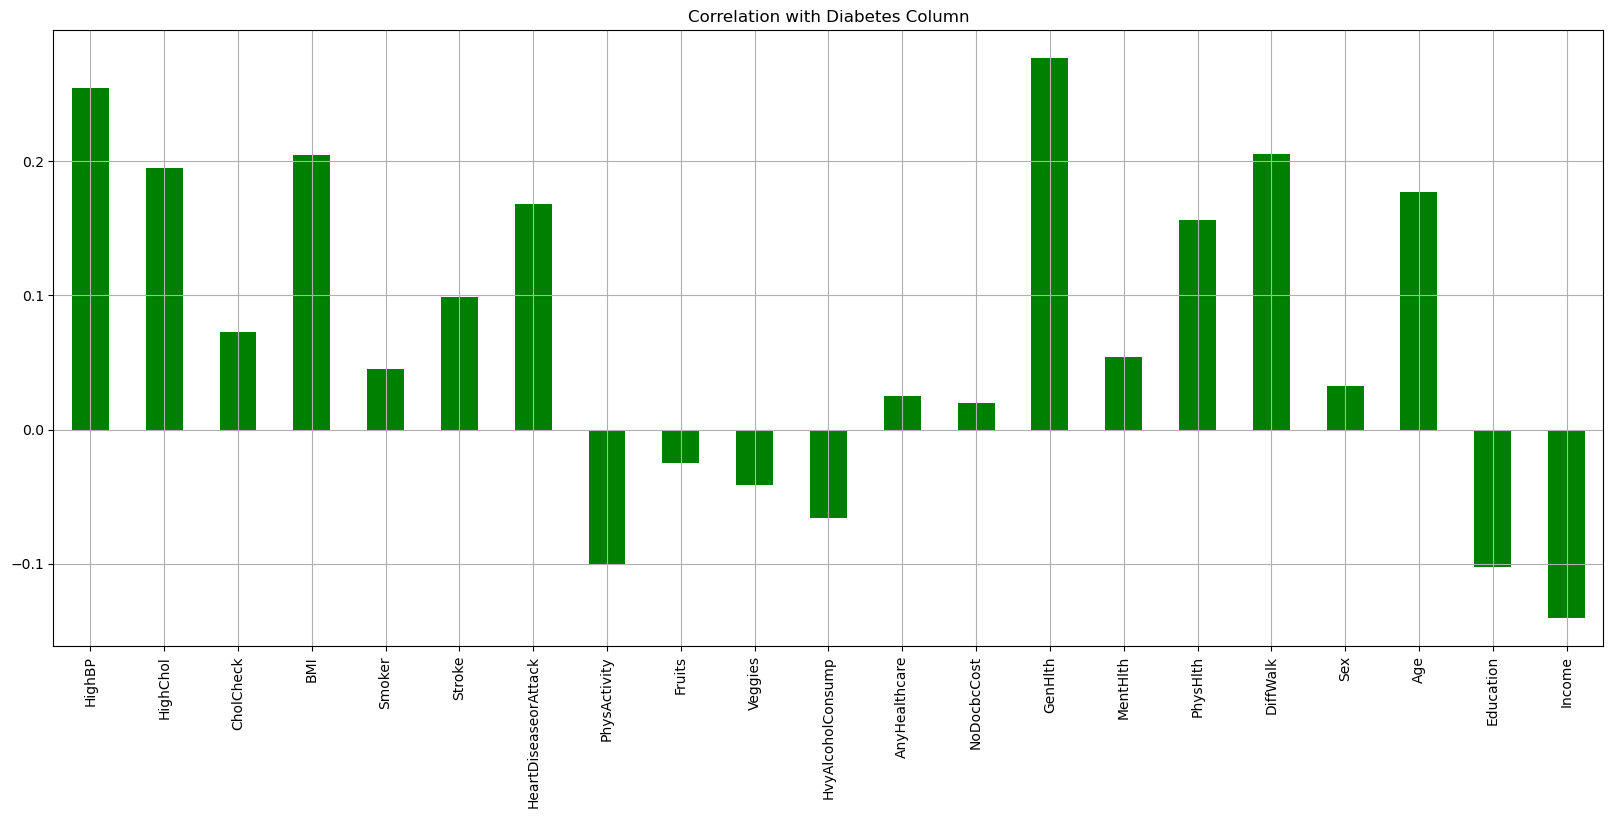

In [12]:
df1.drop('Diabetes_binary', axis=1).corrwith(df1.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Column", color='green')

In [ ]:
labels=['Non-Diabetic', 'Diabetic']
plt.pie(df1["Diabetes_binary"].value_counts() ,labels=labels, autopct='%.02f' );
plt.title('Diabetes Data Label Distribution')

In [14]:
df1.Diabetes_binary.value_counts()

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

In [15]:
Diabetes_df = df1[df1.Diabetes_binary == 1]
NotDiabetes_df = df1[df1.Diabetes_binary == 0]

In [16]:
NotDiabetes_sample = NotDiabetes_df.sample(n=35097, random_state=42)

In [17]:
new_dataset = pd.concat([NotDiabetes_sample,Diabetes_df], axis = 0 )

Text(0.5, 1.0, 'Diabetes Data Label Distribution')

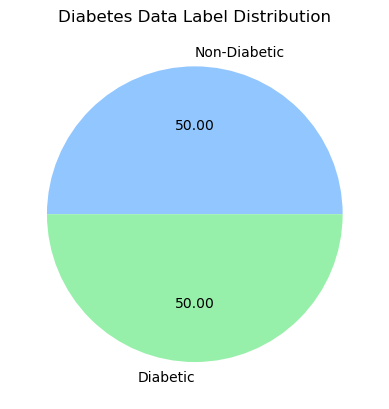

In [18]:
labels=['Non-Diabetic', 'Diabetic']
plt.pie(new_dataset["Diabetes_binary"].value_counts() ,labels=labels, autopct='%.02f' );
plt.title('Diabetes Data Label Distribution')

In [19]:
new_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70194.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70194.0,0.575605,0.494254,0.0,0.0,1.0,1.0,1.0
HighChol,70194.0,0.533707,0.498866,0.0,0.0,1.0,1.0,1.0
CholCheck,70194.0,0.974029,0.159050,0.0,1.0,1.0,1.0,1.0
BMI,70194.0,30.039177,7.255946,12.0,25.0,29.0,33.0,98.0
Smoker,70194.0,0.486466,0.499820,0.0,0.0,0.0,1.0,1.0
Stroke,70194.0,0.065091,0.246688,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70194.0,0.152705,0.359706,0.0,0.0,0.0,0.0,1.0
PhysActivity,70194.0,0.690273,0.462384,0.0,0.0,1.0,1.0,1.0
Fruits,70194.0,0.600949,0.489707,0.0,0.0,1.0,1.0,1.0


In [20]:
## feature scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_dataset[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education','Income']] = scaler.fit_transform(new_dataset[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education','Income']])

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

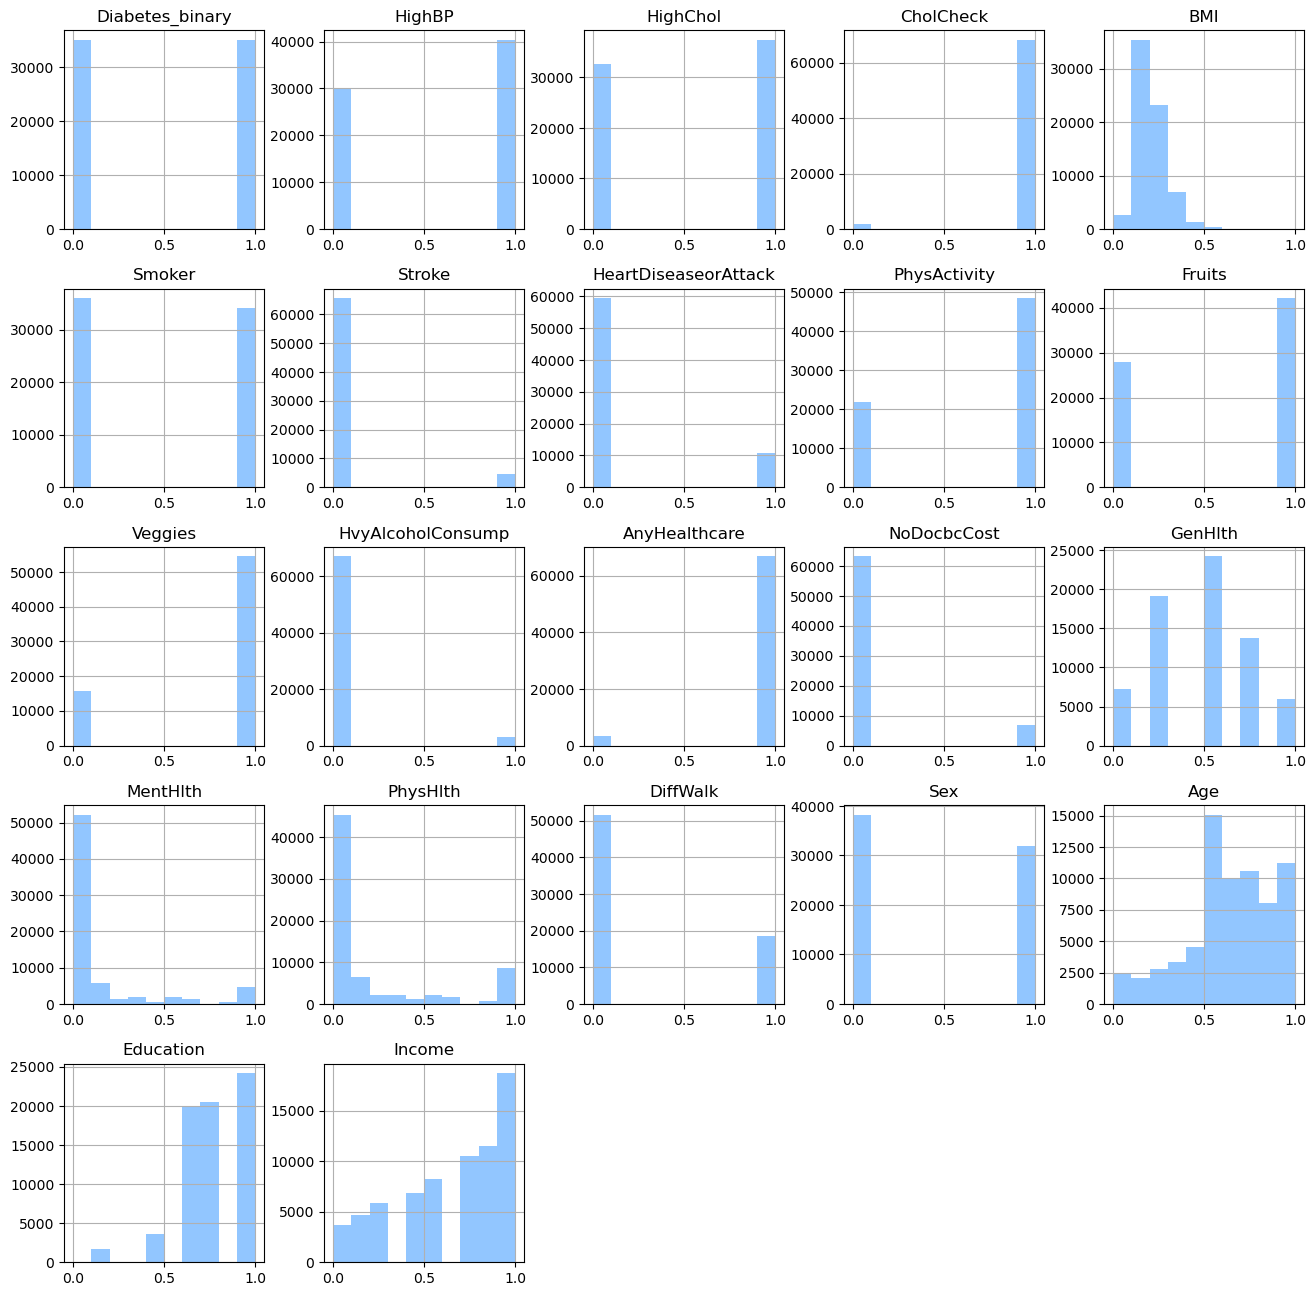

In [90]:
plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
new_dataset.hist(figsize=(16, 16))

In [21]:
new_dataset['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    35097
1.0    35097
Name: count, dtype: int64

# Data Splitting

In [22]:
from sklearn.model_selection import learning_curve, train_test_split

X = new_dataset.drop('Diabetes_binary',axis=1)
y = new_dataset['Diabetes_binary']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model Training 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import recall_score, confusion_matrix

In [24]:
# define a cross validation function using recall as performance metric for all models
def cross_validation(clf_model, X_train, y_train, cv):
    scores = cross_validate(clf_model, X_train, y_train,
                            scoring=['recall'], cv=cv)
    
    mean_recall = np.mean(scores['test_recall'])
    
    return mean_recall

In [25]:
# using cross validation to find best K for the KNN model
df1_KNN = {}
k_values = np.array(range(1, 16))
for k in k_values:
    models = {
        "K-Nearest Neighbour{}".format(k): KNeighborsClassifier(n_neighbors= k, metric='manhattan',algorithm='auto'),}
    for model_name, model in models.items():
        df1_KNN[model_name] = cross_validation(model, X_train, y_train, 5)

In [26]:
df1_KNN_CV = pd.DataFrame.from_dict(df1_KNN, orient='index', columns=['Recall'])

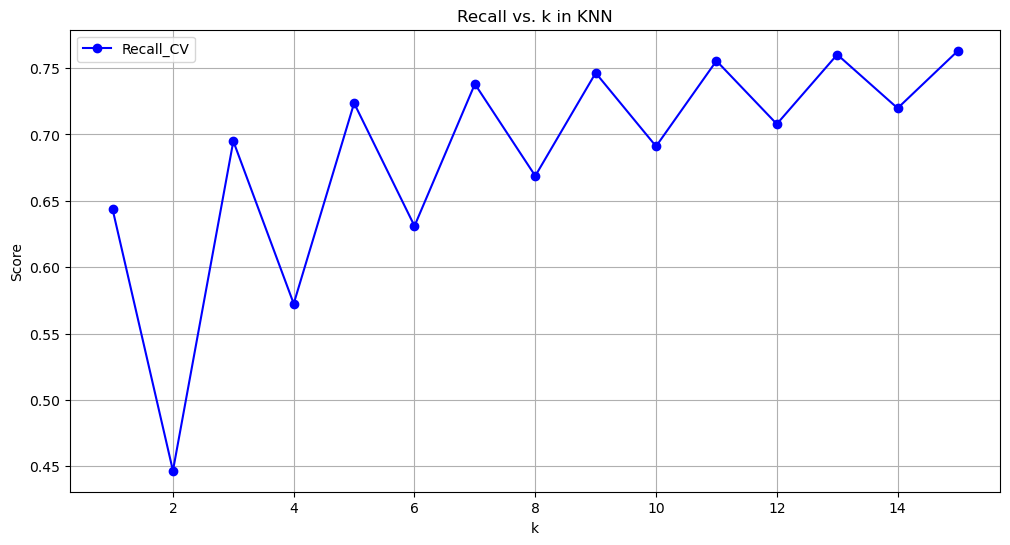

In [27]:
# plot the cross validation recall against K 
plt.figure(figsize=(12, 6))
plt.plot(k_values, df1_KNN_CV["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Recall vs. k in KNN')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # fit the model and calculate fit time 
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    fit_time_KNN = end_time - start_time
    print('KNN_model fit time: ',  fit_time_KNN)
    
    # make predictions and calculate predict time 
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    predict_time_KNN = end_time - start_time
    print('KNN_model predict time: ',  predict_time_KNN)
    
    recall = recall_score(y_test, y_pred)
    
    return recall

In [29]:
KNN_model = KNeighborsClassifier(n_neighbors= 15, metric='manhattan', algorithm='auto')

In [30]:
KNN_recall = evaluate_model(KNN_model, X_train, X_test, y_train, y_test)
KNN_recall

KNN_model fit time:  0.0
KNN_model predict time:  1.6107594966888428


0.7524931142558647

In [31]:
pred_KNN = KNN_model.predict(X_test)

In [32]:
cm_KNN = confusion_matrix(y_test,pred_KNN )
cm_KNN

array([[6868, 3662],
       [2606, 7923]], dtype=int64)

In [33]:
# Define a function to plot learning curve for all models
def plot_learning_curves(model_name, X_train, y_train):
    sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(model_name, X_train, y_train, train_sizes= sizes, cv=5, scoring='recall', n_jobs=-1)

    # Calculate the mean and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score-CV')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Validation score-CV')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')

    titles = "{}.Learning Curves".format(model_name) 
    
    plt.title(titles)
    plt.xlabel('Training Set Size')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.show()

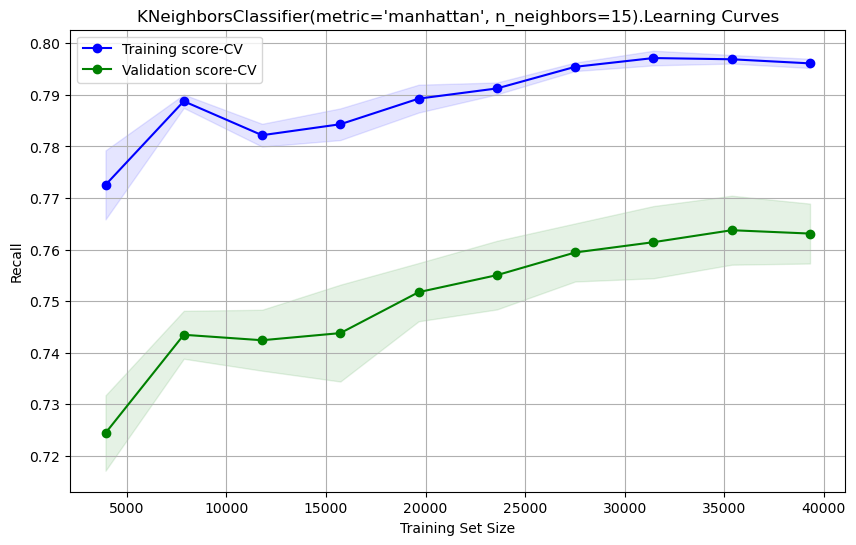

In [34]:
plot_learning_curves(KNN_model, X_train, y_train)

# Neural Network Model

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import StratifiedKFold

In [36]:
tf.random.set_seed(88)

In [37]:
## using cross validation find the best number of neurons in the first hidden layer 
ANN_Neurons_HL1 = {}
neuron_num_hl1 = np.array([60,80,100,120,150])

# Create a stratified K-Fold object for cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for num in neuron_num_hl1:
    cv_recall_scores = []  # To store recall for each fold
    
    for train_idx, val_idx in kfold.split(X_train, y_train):
        # Split the data
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Define the model
        model = Sequential([
            Input(shape=(X_train.shape[1],)),   
            Dense(num, activation='relu'),
            Dense(10, activation='relu'), 
            Dense(1, activation='sigmoid')  # Output layer for binary classification
        ])

        # Compile the model
        model.compile(optimizer=SGD(learning_rate=0.05),
                      loss='binary_crossentropy',
                      metrics=['recall'])

        # Train the model
        model.fit(X_cv_train, y_cv_train, batch_size=50, epochs=50, verbose=0, shuffle=False)
        
        # Evaluate the model on the validation data
        loss, recall = model.evaluate(X_cv_val, y_cv_val, verbose=0)
        
        # Store recall score for this fold
        cv_recall_scores.append(recall)
    
    # Calculate the average recall across all folds
    mean_recall = np.mean(cv_recall_scores)
    
    # Store the mean recall score for this configuration
    model_name = "ANN-Neuron-HL1={}".format(num)
    ANN_Neurons_HL1[model_name] = mean_recall

In [38]:
 ANN_Neurons_HL1 = pd.DataFrame.from_dict(ANN_Neurons_HL1, orient='index', columns=['Recall'])

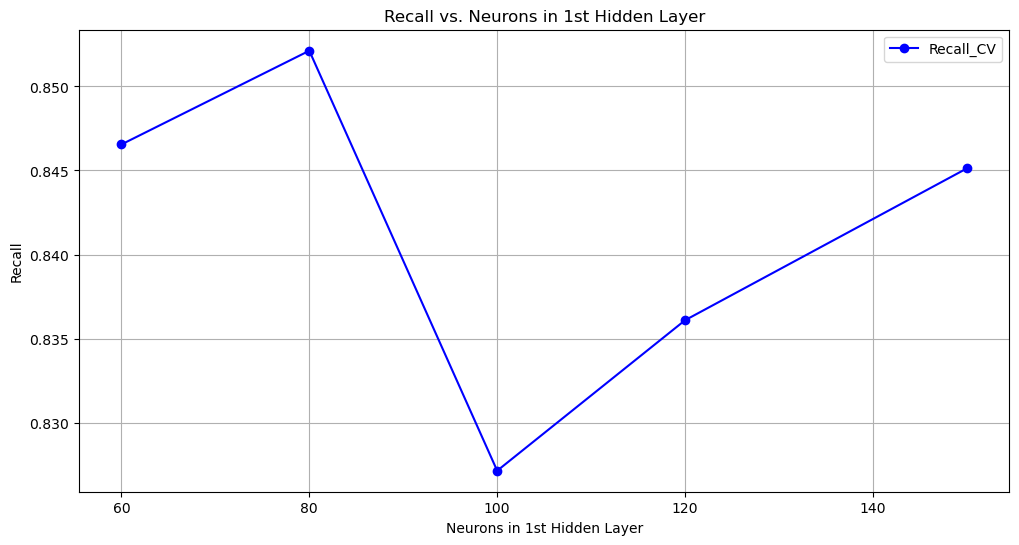

In [39]:
 # plot CV recall against number of neurons in 1st Hidden Layer
plt.figure(figsize=(12, 6))
plt.plot(neuron_num_hl1,  ANN_Neurons_HL1["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Neurons in 1st Hidden Layer')
plt.ylabel('Recall')
plt.title('Recall vs. Neurons in 1st Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
## using cross validation to find the best best number of neorons in the second hidden layer
ANN_Neurons_HL2 = {}
neuron_num_hl2 = np.array([5, 10, 20, 30, 50, 80])
                          
# Create a stratified K-Fold object for cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for num_hl2 in neuron_num_hl2:
    cv_recall_scores = []  # To store recall for each fold
    
    for train_idx, val_idx in kfold.split(X_train, y_train):
        # Split the data
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    # Define the model
    model = Sequential([
        Input(shape=(X_train.shape[1],)),   
        Dense(100, activation='relu'),
        Dense(num, activation='relu'), 
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.05),
                  loss='binary_crossentropy',
                  metrics=['recall'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=50, epochs=50, validation_split=0.3, verbose=0, shuffle=False)
    
    # Evaluate the model on the validation data
    loss, recall = model.evaluate(X_cv_val, y_cv_val, verbose=0)
        
    # Store recall score for this fold
    cv_recall_scores.append(recall)
    
    # Calculate the average recall across all folds
    mean_recall = np.mean(cv_recall_scores)
                          
   # Store the mean recall score for this configuration
    model_name = "ANN-Neuron-HL2={}".format(num_hl2)
    ANN_Neurons_HL2[model_name] = mean_recall

In [41]:
ANN_Neurons_HL2 = pd.DataFrame.from_dict( ANN_Neurons_HL2, orient='index', columns=['Recall'])

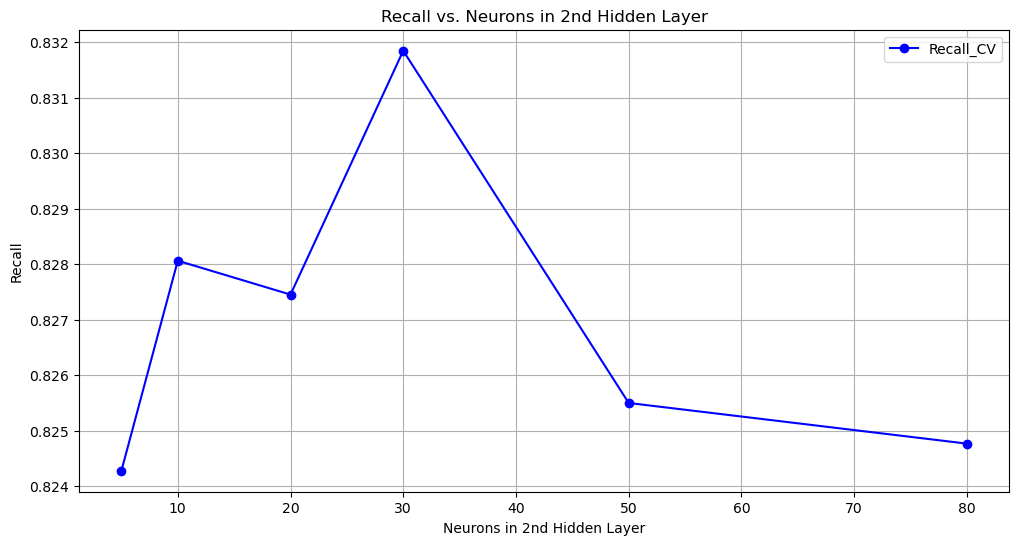

In [42]:
# plot CV recall against number of neurons in 2nd Hidden Layer
plt.figure(figsize=(12, 6))
plt.plot(neuron_num_hl2,  ANN_Neurons_HL2["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Neurons in 2nd Hidden Layer')
plt.ylabel('Recall')
plt.title('Recall vs. Neurons in 2nd Hidden Layer')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
## using cross validation to find the best learning rate
ANN_LR = {}
lr_values = np.array([0.005, 0.01,0.03, 0.05,0.08])

# Create a stratified K-Fold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for lr in lr_values:
    cv_recall_scores = []  # To store recall for each fold
    
    for train_idx, val_idx in kfold.split(X_train, y_train):
        # Split the data
        X_cv_train, X_cv_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
    # Define the model
    model = Sequential([
        Input(shape=(X_train.shape[1],)),   
        Dense(100, activation='relu'),
        Dense(20, activation='relu'), 
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['recall'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=50, epochs=50, validation_split=0.3, verbose=0, shuffle=False)
    
    # Evaluate the model on the validation data
    loss, recall = model.evaluate(X_cv_val, y_cv_val, verbose=0)
        
    # Store recall score for this fold
    cv_recall_scores.append(recall)
    
    # Calculate the average recall across all folds
    mean_recall = np.mean(cv_recall_scores)
                          
   # Store the mean recall score for this configuration
    model_name = "ANN-LR={}".format(lr)
    ANN_LR[model_name] = mean_recall

In [44]:
ANN_LR = pd.DataFrame.from_dict( ANN_LR, orient='index', columns=['Recall'])

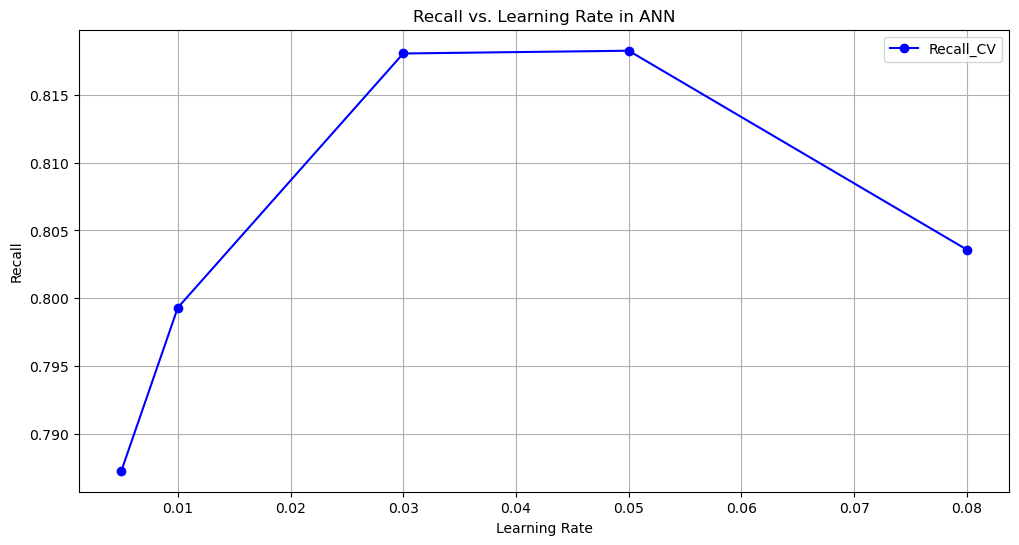

In [45]:
## using cross validation to find the best learning rate
plt.figure(figsize=(12, 6))
plt.plot(lr_values,  ANN_LR["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Learning Rate')
plt.ylabel('Recall')
plt.title('Recall vs. Learning Rate in ANN')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
## Build a best ANN model using the best values we found for the hyperparameters
model = Sequential([
        Input(shape=(X_train.shape[1],)),   
        Dense(100, activation='relu'),
        Dense(20, activation='relu'), 
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

model.compile(optimizer=SGD(learning_rate=0.05),
                  loss='binary_crossentropy',
                  metrics=['recall'])

In [47]:
# fit the ANN model and calculate fit time
start_time = time.time()
history = model.fit(X_train, y_train, batch_size = 200, epochs=50, validation_split=0.3, verbose=0, shuffle = False)
end_time = time.time() 
fit_time_ANN = end_time - start_time
print('ANN_model fit time: ', fit_time_ANN)

ANN_model fit time:  8.374268531799316


In [48]:
#make predictions with ANN and calculate the predict time
start_time = time.time()
pred_binary = np.where(model.predict(X_test) > 0.5, 1, 0)
end_time = time.time() 
predict_time_ANN = end_time - start_time
print('ANN_model predict time: ', predict_time_ANN)

659/659 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
ANN_model predict time:  0.46151113510131836


In [49]:
np.unique(pred_binary)

array([0, 1])

In [50]:
pred_binary = pd.DataFrame(pred_binary)
pred_binary.value_counts()

0
1    11959
0     9100
Name: count, dtype: int64

In [51]:
cm_ann = confusion_matrix(y_test, pred_binary)
cm_ann

array([[6970, 3560],
       [2130, 8399]], dtype=int64)

In [52]:
loss, recall = model.evaluate(X_test,y_test)
print(f'Test recall: {recall:.2f}')

659/659 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.5364 - recall: 0.8004
Test recall: 0.80


In [53]:
ANN_result = pd.DataFrame(history.history)

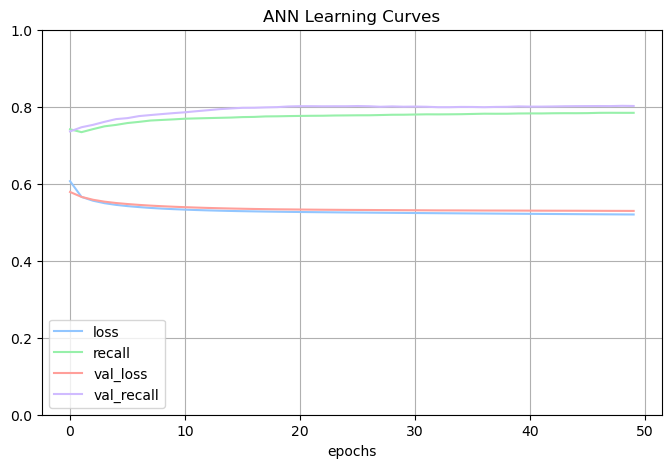

In [54]:
# plot the learning curve of ANN 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('ANN Learning Curves')
plt.xlabel('epochs')
plt.legend(loc='best')    
plt.show()

# SVM Model

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score

In [56]:
## using cross validation to find the best cost value in SVM with RBF kernel
SVM_RBF_C = {}
cost_values = np.array([0.5, 1, 2, 3, 4, 5])
for cost in cost_values:
    models = {
        "SVM-RBF-C={}".format(cost): SVC(C=cost, kernel='rbf', gamma=0.05)}
    for model_name, model in models.items():
        SVM_RBF_C[model_name] = cross_validation(model, X_train, y_train, 3)

In [57]:
SVM_RBF_C = pd.DataFrame.from_dict(SVM_RBF_C, orient='index', columns=['Recall'])

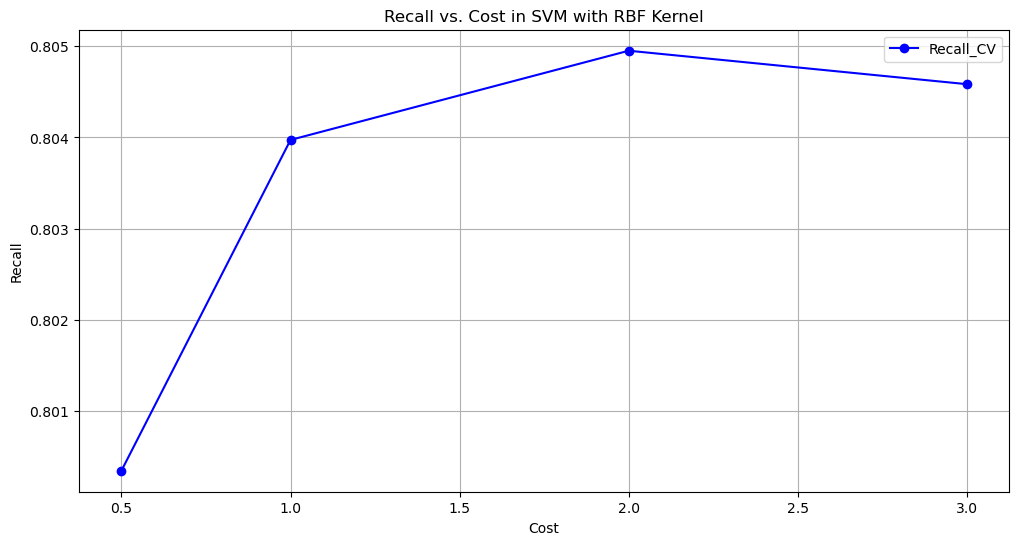

In [58]:
# plot the cross validation recall against cost in SVM with RBF kernel 
plt.figure(figsize=(12, 6))
plt.plot(cost_values, SVM_RBF_C["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Cost')
plt.ylabel('Recall')
plt.title('Recall vs. Cost in SVM with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# using cross validation to find the best gamma in SVM with RBF kernel
SVM_RBF_G = {}
gamma_values = np.array([0.001,0.005, 0.01, 0.05, 0.1])
for g in gamma_values:
    models = {
        "SVM-RBF-G={}".format(g): SVC(C=2, kernel='rbf', gamma=g)}
    for model_name, model in models.items():
        SVM_RBF_G[model_name] = cross_validation(model, X_train, y_train, 3)

In [60]:
SVM_RBF_G = pd.DataFrame.from_dict(SVM_RBF_G, orient='index', columns=['Recall'])

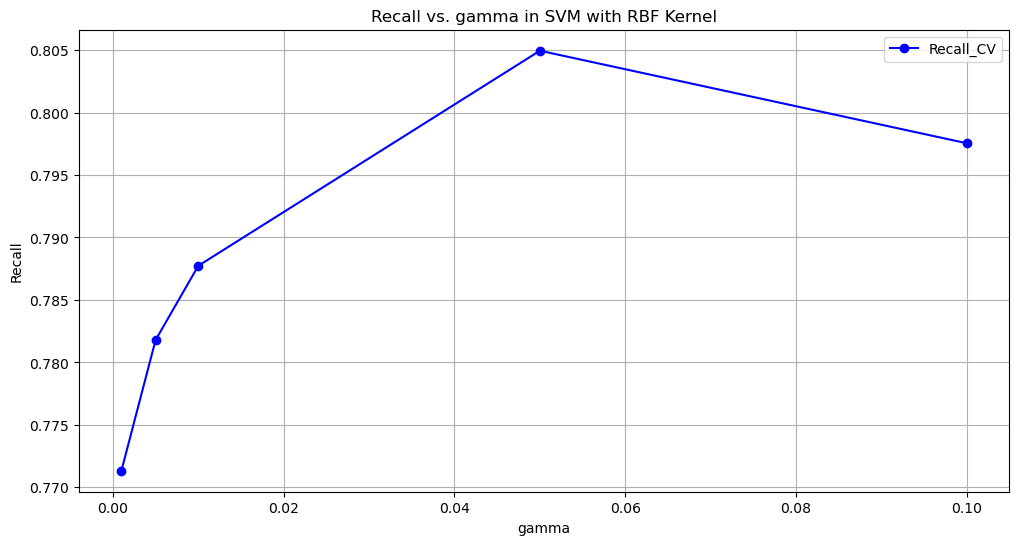

In [61]:
# plot the cross validation recall against gamma in SVM with RBF kernel
plt.figure(figsize=(12, 6))
plt.plot(gamma_values, SVM_RBF_G["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('gamma')
plt.ylabel('Recall')
plt.title('Recall vs. gamma in SVM with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# fit the SVM model with the best cost value and gamma value found through cross validation and calculate fit time 
best_SVM_RBF = SVC(C=2, kernel='rbf', gamma=0.05)

start_time = time.time()
best_SVM_RBF.fit(X_train, y_train)
end_time = time.time() 
fit_time_SVM_RBF = end_time - start_time
print('SVM with RBF kernel fit time: ', fit_time_SVM_RBF)

SVM with RBF kernel fit time:  47.70563054084778


In [63]:
# make predictions using SVM with RBF kernel and calculate predict time  
start_time = time.time()
pred_SVM = best_SVM_RBF.predict(X_test)
end_time = time.time() 
predict_time_SVM_RBF = end_time - start_time
print('SVM with RBF kernel predict time: ', predict_time_SVM_RBF)

SVM with RBF kernel predict time:  32.62793803215027


In [64]:
SVM_RBF_recall = recall_score(y_test, pred_SVM)

In [65]:
SVM_RBF_recall

0.8017855446861051

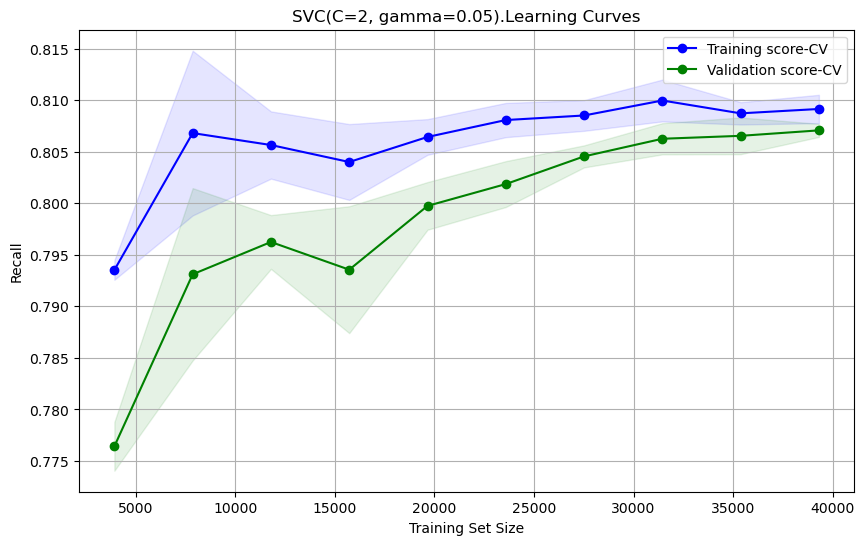

In [66]:
plot_learning_curves(best_SVM_RBF,X_train, y_train)

In [68]:
## using cross validation to find the best cost value in SVM with a quadratic polynomial kernel 
SVM_POLY_C = {}
cost_values = np.array([0.5, 1, 2, 3, 4, 5])
for cost in cost_values:
    models = {
        "SVM-POLY-C={}".format(cost): SVC(C=cost, kernel='poly', degree= 2)}
    for model_name, model in models.items():
        SVM_POLY_C[model_name] = cross_validation(model, X_train, y_train, 3)

In [69]:
SVM_POLY_C = pd.DataFrame.from_dict(SVM_POLY_C, orient='index', columns=['Recall'])

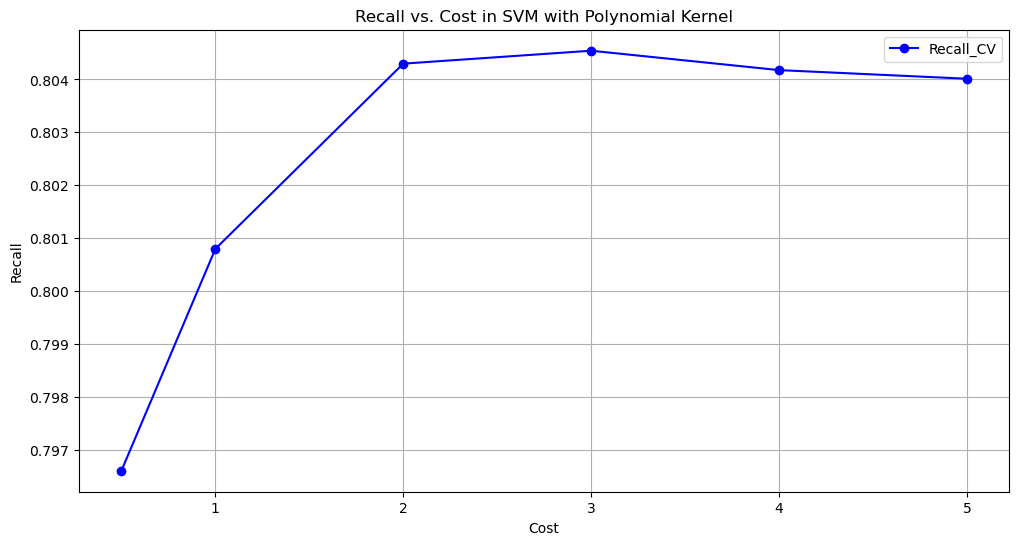

In [70]:
## plot the cross validation recall against cost in SVM with quadratic kernel 
plt.figure(figsize=(12, 6))
plt.plot(cost_values, SVM_POLY_C["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('Cost')
plt.ylabel('Recall')
plt.title('Recall vs. Cost in SVM with Polynomial Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
## using cross validation to find the best degree value in SVM with a polynomial kernel 
SVM_POLY_D = {}
d_values = np.array([1,2,3,4,5,6])
for d in d_values:
    models = {
        "SVM-POLY-D={}".format(d): SVC(C=3, kernel='poly', degree=d)}
    for model_name, model in models.items():
        SVM_POLY_D[model_name] = cross_validation(model, X_train, y_train, 3)

In [84]:
SVM_POLY_D = pd.DataFrame.from_dict(SVM_POLY_D, orient='index', columns=['Recall'])

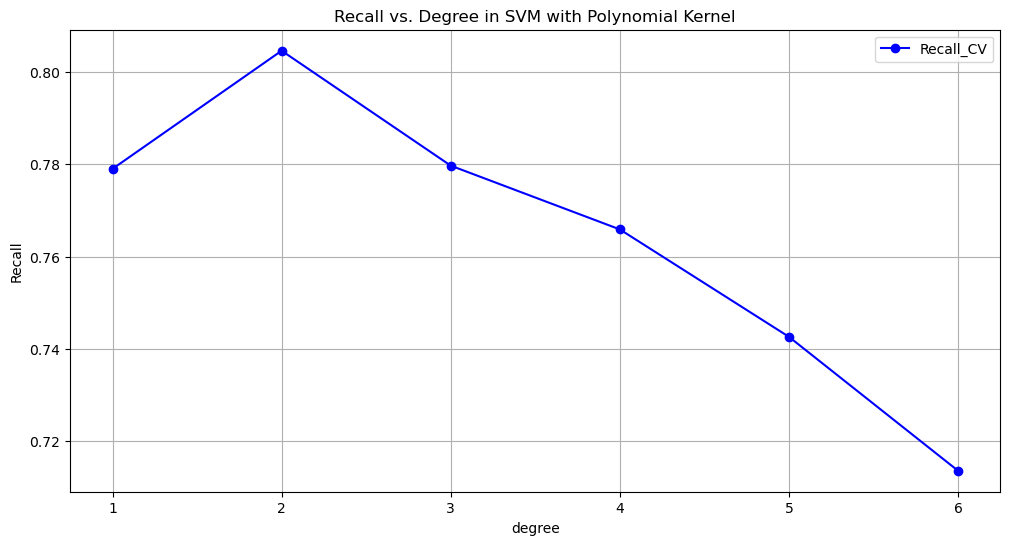

In [85]:
## plot the cross validation recall against the degree value in SVM with a polynomial kernel 
plt.figure(figsize=(12, 6))
plt.plot(d_values, SVM_POLY_D["Recall"], marker='o', linestyle='-', color='blue', label='Recall_CV')
plt.xlabel('degree')
plt.ylabel('Recall')
plt.title('Recall vs. Degree in SVM with Polynomial Kernel')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# fit the SVM model with the best degree value,cost value found through cross validation and calculate fit time
best_SVM_POLY = SVC(C=3, kernel='poly', degree=2)

start_time = time.time()
best_SVM_POLY.fit(X_train, y_train)
end_time = time.time() 
fit_time_SVM_POLY = end_time - start_time
print('SVM with polynomial kernel fit time: ', fit_time_SVM_POLY)

SVM with polynomial kernel fit time:  47.14507508277893


In [87]:
# make predictions using SVM with polynomial kernel and calculate predict time  
start_time = time.time()
pred_SVM_POLY = best_SVM_POLY.predict(X_test)
end_time = time.time() 
predict_time_SVM_POLY = end_time - start_time
print('SVM with polynomial kernel predict time: ', predict_time_SVM_POLY)

SVM with polynomial kernel predict time:  8.106482028961182


In [88]:
# calculate the recall 
SVM_POLY_recall = recall_score(y_test, pred_SVM_POLY)
SVM_POLY_recall

0.8008357868743471

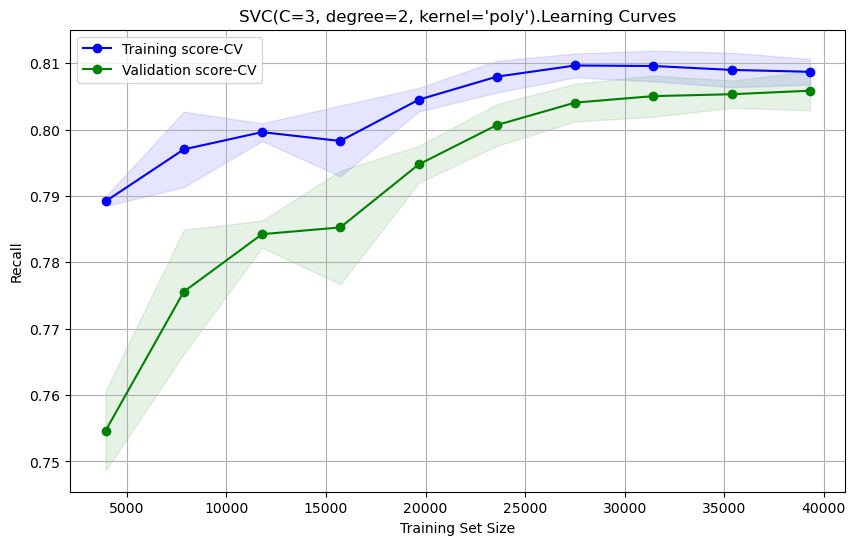

In [89]:
plot_learning_curves(best_SVM_POLY,X_train, y_train)

In [78]:
# Program End time
program_end_time = time.time()

# Calculate elapsed time for the whole program
elapsed_time = program_end_time - program_start_time

print(elapsed_time)

8080.4974110126495
